# Look data

## Settings

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import librosa
import librosa.display

import IPython.display as ipd

In [2]:
data_dir = Path().cwd().parent/'data'/'external'/'ESC-50'
audio_dir = data_dir/'audio'
meta_data_path = data_dir/'meta'/'esc50.csv'

In [3]:
meta_data = pd.read_csv(str(meta_data_path))

In [4]:
meta_data

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A
5,1-101296-B-19.wav,1,19,thunderstorm,False,101296,B
6,1-101336-A-30.wav,1,30,door_wood_knock,False,101336,A
7,1-101404-A-34.wav,1,34,can_opening,False,101404,A
8,1-103298-A-9.wav,1,9,crow,False,103298,A
9,1-103995-A-30.wav,1,30,door_wood_knock,False,103995,A


## Load

In [25]:
idx = 5

In [26]:
meta = meta_data.iloc[idx, :]

In [27]:
meta

filename    1-101296-B-19.wav
fold                        1
target                     19
category         thunderstorm
esc10                   False
src_file               101296
take                        B
Name: 5, dtype: object

In [28]:
fpath = audio_dir/meta['filename']

In [29]:
x, fs = librosa.load(str(fpath))

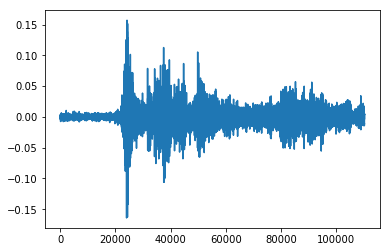

In [30]:
plt.plot(x)
plt.show()

In [31]:
ipd.Audio(x, rate=fs)

## Spectrogram

In [32]:
def calculate_sp(x, n_fft=512, hop_length=256):
    # change wave data to stft
    stft = librosa.stft(x, n_fft=n_fft, hop_length=hop_length)
    sp = librosa.amplitude_to_db(np.abs(stft))
    return sp

In [33]:
def show_sp(sp, fs, hop_length):
    # display wave in spectrogram
    librosa.display.specshow(sp, sr=fs, x_axis="time", y_axis="log", hop_length=hop_length)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.show()

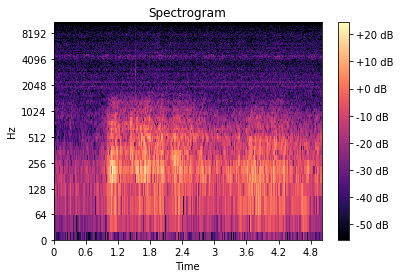

In [34]:
sp = calculate_sp(x)
show_sp(sp, fs, hop_length=256)

## Mel Spectrogram

In [35]:
def calculate_melsp(x, n_fft=1024, hop_length=128):
    stft = np.abs(librosa.stft(x, n_fft=n_fft, hop_length=hop_length))**2
    log_stft = librosa.power_to_db(stft)
    melsp = librosa.feature.melspectrogram(S=log_stft,n_mels=128)
    return melsp

In [36]:
def show_melsp(melsp, fs):
    # display wave in heatmap
    librosa.display.specshow(melsp, sr=fs, x_axis="time", y_axis="mel", hop_length=128)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel spectrogram')
    plt.show()

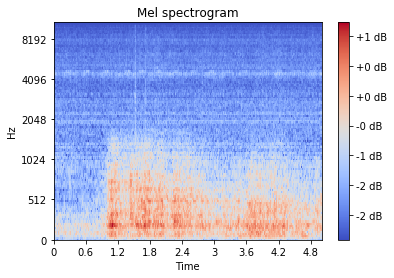

In [37]:
melsp = calculate_melsp(x)
show_melsp(melsp, fs)

## Data Augmantation

In [ ]:
def add_white_noise(x, rate=0.002):
    return x + rate*np.random.randn(len(x))

In [ ]:
def shift_sound(x, rate=2):
    return np.roll(x, int(len(x)//rate))

In [ ]:
def stretch_sound(x, rate=1.1):
    input_length = len(x)
    x = librosa.effects.time_stretch(x, rate)
    if len(x)>input_length:
        return x[:input_length]
    else:
        return np.pad(x, (0, max(0, input_length - len(x))), "constant")